### Importing libraries

In [1]:
from __future__ import division
from scipy.cluster.hierarchy import ward, fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
import numpy as np
import os
import re
import scipy.integrate
from scipy.constants import N_A
from scipy.integrate import odeint
import h5py
import matplotlib
import math
import numpy as np
import os
import re
from pylab import *
np.seterr(divide='ignore',invalid='ignore')
pass

### Defining functions

In [2]:
# plot styles
def screen_style(fontSize=20):
    global plotStyles,stepStyles,plotColors,plotSymbols
    matplotlib.rcParams.update({"axes.formatter.limits": (-4,4), "svg.fonttype" : "none", 'pdf.fonttype':42,'font.family':'sans-serif','font.sans-serif':'Helvetica','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,'text.usetex':False,'text.latex.preamble':[r'\usepackage{sansmath}',r'\sansmath']})
    plotStyles={"markersize":12,"markeredgewidth":3.0,"linewidth":3.0}
    stepStyles={"markersize":20,"markeredgewidth":3.0,"linewidth":3.0,"where":"post"}
    plotColors=plt.rcParams['axes.prop_cycle'].by_key()['color']
    plotSymbols=['x','o','^']

# solve differential equations    
def solve_dif_eq(y,t,k1,k2,k3,k4):
    dx1  = -2*k1*((1-2*y[1])**2) + 2*k2*y[1] - 2*k3*((1-2*y[1])**2)*(y[1]**2) + 2*k4*(y[1]**3)                     # y[0]
    dx2  = +k1*((1-2*y[1])**2) - k2*y[1] + k3*((1-2*y[1])**2)*(y[1]**2) - k4*(y[1]**3)                     # y[1]          
    return[dx1,dx2]

# Function to calculate entropy production
def EntropyProduction(x1,k1,k2,k3,k4):
    x2=(1-x1)/2
    Jneg1=k2*x2;
    Jpos1=k1*(x1**2)
    Jneg2=k4*(x2**3)
    Jpos2=k3*(x2**2)*(x1**2)
    r1  =(Jneg1-Jpos1)*log(Jneg1/Jpos1)
    r2  =(Jpos2-Jneg2)*log(Jpos2/Jneg2) 
    Et=r1+r2       
    return[Et]

# Function to calculate chemical potential
def ChemicalPotential(k1,k2,k3,k4):   
    return[log((k2* k3)/(k1*k4))]

In [3]:
screen_style() # calling plot styles functions

### Figure 2a

### First interval

In [4]:
fsss0=[] # first stable steady state
k3_axis0=[]
k1=k4=0.1 ;k2=100
x1=linspace(0,1.5,100000)
y0=x1*0
k3sample2=logspace(2,4,1000)[0:570]
for k3 in k3sample2:  
    dx1  = -k1*((x1)**2) + k2*(0.5-0.5*x1) - k3*((x1)**2)*((0.5-0.5*x1)**2) + k4*((0.5-0.5*x1)**3)
    index=np.where(np.logical_and(dx1>=-0.1, dx1<=+0.1))
    index3=np.where(np.logical_and(x1[index]>=0.99, x1[index]<1))
    fsss0.append(x1[index][index3][0])
    k3_axis0.append(k3)

### Second interval

In [5]:
fsss=[] # first stable steady state before 
ssss=[] # second sss
midpoint=[] # unstable steady state
k3_axis=[]
k1=k4=0.1
k2=100 # k2 value for test
x1=linspace(0,1.5,100000) # x1 fraction
y0=x1*0
k3sample1=logspace(3,5,1000)[65:630] 
for k3 in k3sample1:  
    dx1  = -k1*((x1)**2) + k2*(0.5-0.5*x1) - k3*((x1)**2)*((0.5-0.5*x1)**2) + k4*((0.5-0.5*x1)**3)
    index=np.where(np.logical_and(dx1>=-0.01, dx1<=+0.01))
    index2=np.where(np.logical_and(x1[index]>=0.67, x1[index]<0.993))
    midpoint.append(x1[index][index2][0])
    index4=np.where(np.logical_and(x1[index]>=0.993, x1[index]<=1))
    ssss.append(x1[index][index4][0])
    index3=np.where(np.logical_and(x1[index]>=0, x1[index]<0.67))
    fsss.append(x1[index][index3][0])
    k3_axis.append(k3)

### Third interval

In [6]:
fsss2=[] # first stable steady state
k3_axis2=[]
k1=k4=0.1
k2=100
x1=linspace(0,1.5,100000)
y0=x1*0
k3sample2=logspace(3,5,1000)[640:900]
for k3 in k3sample2:  
    dx1  = -k1*((x1)**2) + k2*(0.5-0.5*x1) - k3*((x1)**2)*((0.5-0.5*x1)**2) + k4*((0.5-0.5*x1)**3)
    index=np.where(np.logical_and(dx1>=-0.1, dx1<=+0.1))
    index3=np.where(np.logical_and(x1[index]>=0, x1[index]<0.67))
    fsss2.append(x1[index][index3][0])
    k3_axis2.append(k3)
print("ready")

ready


### Combining and plotting intervals

/home/local/WIN/bciezah1/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


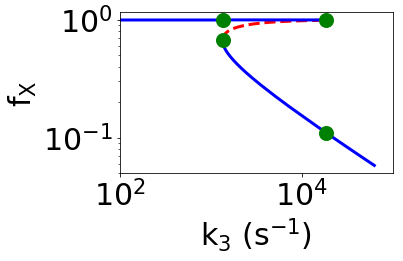

In [7]:
fig, ax = plt.subplots()
ax.plot(k3_axis0,fsss0,'b-',**plotStyles)
ax.plot(k3_axis,midpoint,'r--',**plotStyles)
ax.plot(k3_axis,fsss,'b-',**plotStyles)
ax.plot(k3_axis,ssss,'b-',**plotStyles)
ax.plot(k3_axis2,fsss2,'b-',**plotStyles)
ax.plot(1349.36,0.668,'go',**plotStyles)
ax.plot(1349.36,1,'go',**plotStyles)
ax.plot(18500,1,'go',**plotStyles)
ax.plot(18500,0.1085,'go',**plotStyles)
xlim([1e+2,1e+5])
yscale('log')
xscale('log')
ax.tick_params(axis='both',which='major',labelsize=30)
xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=30);ylabel('$\mathregular{f_{X}}$',fontsize=30)
tight_layout()

### Figure 2c and d

### Sample space

In [8]:
Ninterval=1000 #number of points in the plot
k2_initial_sample=-2 # minimum exponent to sample
k3_initial_sample=-2 # minimum exponent to sample
k2_last_sample=4 # maximum exponent to sample
k3_last_sample=5 #maximum exponent to sample

### Solution #1

In [9]:
samplek2=logspace(k2_initial_sample,k2_last_sample,Ninterval) # create points in the k2 axis
samplek3=logspace(k3_initial_sample,k3_last_sample,Ninterval) # create points in the k3 axis
count_samplek2=len(samplek2)   #count sample points
count_samplek3=len(samplek3)   #count sample points
my_2d_array_sol1=np.zeros((count_samplek2,count_samplek3),dtype=float) # matrix to storage data
tout=np.linspace(1,50,50) # simulation time
k1=k4=0.1 # constant values
first_ss=[1,0] # all X initial state
countk2=-1 
for k2 in samplek2: # start iteration in k2
    countk2=countk2+1
    countk3=-1
    for k3  in samplek3: # start iteration in k3
        countk3=countk3+1
        k_vals=k1,k2,k3,k4 # temporal ks values in the current interation
        y_first=odeint(solve_dif_eq,first_ss,tout,k_vals) # first solution
        my_2d_array_sol1[countk2][countk3]=y_first[-1,0]  # storing solution
print("ready")

ready


### Solution #2

In [10]:
samplek2=logspace(k2_initial_sample,k2_last_sample,Ninterval)  # create points in the k2 axis
samplek3=logspace(k3_initial_sample,k3_last_sample,Ninterval) # create points in the k3 axis
count_samplek2=len(samplek2)   #count sample points
count_samplek3=len(samplek3)   #count sample points
my_2d_array_sol2=np.zeros((count_samplek2,count_samplek3),dtype=float) # matrix to storage data
tout=np.linspace(1,50,50) #simulation time
k1=k4=0.1 # constant values
second_ss=[0,0.5] # all Y initial state
countk2=-1
for k2 in samplek2: # start iteration in k2
    countk2=countk2+1
    countk3=-1
    for k3  in samplek3: # start iteration in k3
        countk3=countk3+1
        k_vals=k1,k2,k3,k4 # temporal ks values in the current interation
        y_second=odeint(solve_dif_eq,second_ss,tout,k_vals) #second solution
        my_2d_array_sol2[countk2][countk3]=y_second[-1,0] #sotring solution
print("ready")

ready


### Bistability contour

In [11]:
# just bistability regions will be different than zero
matrix_diff=np.round(my_2d_array_sol2,2)-np.round(my_2d_array_sol1,2) 

### plot solution #1

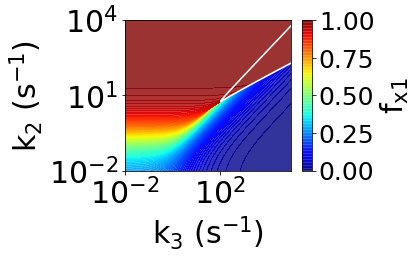

In [12]:
CF=plt.contourf(samplek3,samplek2,my_2d_array_sol1,100,cmap=plt.cm.jet,alpha=0.8) # heatmap
v=linspace(0,1,5,endpoint=True) # vector with numbers for color bar
cb=plt.colorbar(ticks=v, aspect=15) #defining color bar
cb.set_label(label='$\mathregular{f_{x1}}$',fontsize=30) #label for color bar
cb.ax.tick_params(labelsize=25) # ax is IMPORTNAT!!
CL=plt.contour(samplek3,samplek2,matrix_diff,1,colors=('r','white')) # bistability border
ylabel('$\mathregular{k_2}$ (s${^{-1}}$)',fontsize=30);xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=30) #axis
tick_params(axis='both',which='major',labelsize=30)#axis parameters
yscale('log')
xscale('log')
tight_layout()

### plot solution #2

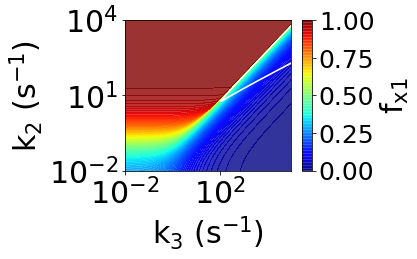

In [13]:
CF=plt.contourf(samplek3,samplek2,my_2d_array_sol2,100,cmap=plt.cm.jet,alpha=0.8)
v=linspace(0,1,5,endpoint=True) # vector with numbers for color bar
cb=plt.colorbar(ticks=v, aspect=15) #defining color bar
cb.set_label(label='$\mathregular{f_{x1}}$',fontsize=30) #label for color bar
cb.ax.tick_params(labelsize=25) # ax is IMPORTNAT!!
CL=plt.contour(samplek3,samplek2,matrix_diff,1,colors=('r','white')) # bistability border
ylabel('$\mathregular{k_2}$ (s${^{-1}}$)',fontsize=30);xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=30) #axis
tick_params(axis='both',which='major',labelsize=30)#axis parameters
yscale('log')
xscale('log')
tight_layout()

### Figure 2e and f

### Entropy production's first stable steady state

In [14]:
samplek2=logspace(k2_initial_sample,k2_last_sample,Ninterval)  # create points in the k2 axis
samplek3=logspace(k3_initial_sample,k3_last_sample,Ninterval) # create points in the k3 axis
count_samplek2=len(samplek2)   #count sample points
count_samplek3=len(samplek3)   #count sample points
my_2d_array_e1=np.zeros((count_samplek2,count_samplek3),dtype=float) # matrix to storage data
tout=np.linspace(1,50,50) #simulation time
k1=k4=1 # constant values
first_ss=[1,0] # all X initial state
countk2=-1
for k2 in samplek2: # start iteration in k2
    countk2=countk2+1
    countk3=-1
    for k3  in samplek3: # start iteration in k3
        countk3=countk3+1
        k_vals=k1,k2,k3,k4 # temporal rate values
        y_first=odeint(solve_dif_eq,first_ss,tout,k_vals) # getting first solution
        my_2d_array_e1[countk2][countk3]=np.asarray(EntropyProduction(y_first[-1,0],k1,k2,k3,k4)) # saving the solution
print("ready")

ready


In [15]:
# adding cuttof to improve resolution
log10my2de1=log10(my_2d_array_e1) # first solution
log10my2de1[log10my2de1<-30]=-30 # any value < -30 will be equal to -30
log10my2de1[log10my2de1>3.5]=3.5 # any value > +3.5 will be equal to +3.5

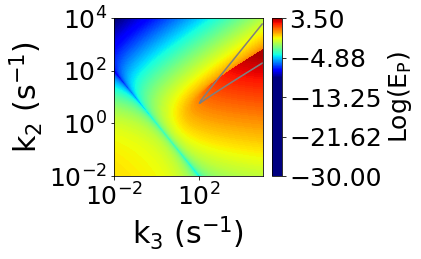

In [16]:
CF=plt.contourf(samplek3,samplek2,log10my2de1,500,cmap=plt.cm.jet,vmin=-9,vmax=4) #heatmap
v=linspace(-30,3.5,5,endpoint=True) # numerical vector for colorbar
cb=plt.colorbar(ticks=v, aspect=15) # defining colorbar
cb.set_label(label='Log($\mathregular{E_{P}}$)',fontsize=25) #label colorbar
cb.ax.tick_params(labelsize=25) #ax is EXTRAMEDLY IMPORTNAT!!
CL=plt.contour(samplek3,samplek2,matrix_diff,1,cmap=plt.cm.binary) #bistability limit
ylabel('$\mathregular{k_2}$ (s${^{-1}}$)',fontsize=30);xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=30) #label
tick_params(axis='both',which='major',labelsize=25) # tick size for axis in plot
yscale('log');xscale('log')
tight_layout()

### Entropy production's second stable steady state

In [17]:
samplek2=logspace(k2_initial_sample,k2_last_sample,Ninterval)  # create points in the k2 axis
samplek3=logspace(k3_initial_sample,k3_last_sample,Ninterval) # create points in the k3 axis
count_samplek2=len(samplek2)   #count sample points
count_samplek3=len(samplek3)   #count sample points
my_2d_array_e2=np.zeros((count_samplek2,count_samplek3),dtype=float) # matrix to storage data
tout=np.linspace(1,50,50) #simulation time
k1=k4=1
second_ss=[0,0.5]
countk2=-1
for k2 in samplek2:
    countk2=countk2+1
    countk3=-1
    for k3  in samplek3:
        countk3=countk3+1
        k_vals=k1,k2,k3,k4
        y_second=odeint(solve_dif_eq,second_ss,tout,k_vals) 
        my_2d_array_e2[countk2][countk3]=np.asarray(EntropyProduction(y_second[-1,0],k1,k2,k3,k4))
print("ready")

ready


In [18]:
# adding low and upper cuttof
log10my2de2=log10(my_2d_array_e2)
log10my2de2[log10my2de2<-30]=-30
log10my2de2[log10my2de2>3.5]=3.5

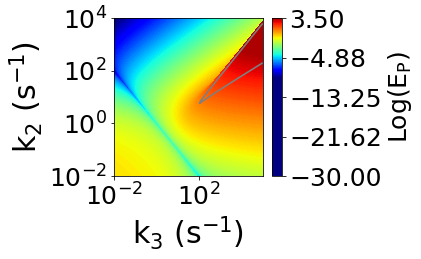

In [19]:
v=linspace(-30,3.5,5,endpoint=True)
CF=plt.contourf(samplek3,samplek2,log10my2de2,500,cmap=plt.cm.jet,vmin=-9.0,vmax=4.0)
cb=plt.colorbar(ticks=v, aspect=15)
cb.set_label(label='Log($\mathregular{E_{P}}$)',fontsize=25)
cb.ax.tick_params(labelsize=25) #ax in EXTRAMEDLY IMPORTNAT!!
CL=plt.contour(samplek3,samplek2,matrix_diff,1,cmap=plt.cm.binary) #locator=ticker.LogLocator()
ylabel('$\mathregular{k_2}$ (s${^{-1}}$)',fontsize=30);xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=30)
tick_params(axis='both',which='major',labelsize=25) # tick size for axis in plot
yscale('log');xscale('log')
tight_layout()
#plt.savefig("entropy2_jet_log.pdf")

## Figure 2b

### Chemical potential function

In [20]:
samplek2=logspace(k2_initial_sample,k2_last_sample,Ninterval)
samplek3=logspace(k3_initial_sample,k3_last_sample,Ninterval)
count_samplek2=len(samplek2)   #count sample points
count_samplek3=len(samplek3)   #count sample points
my_2d_array_cp=np.zeros((count_samplek2,count_samplek3),dtype=float) # matrix to storage data
k1=k4=1
countk2=-1
for k2 in samplek2:
    countk2=countk2+1
    countk3=-1
    for k3  in samplek3:
        countk3=countk3+1
        my_2d_array_cp[countk2][countk3]=np.asarray(ChemicalPotential(k1,k2,k3,k4))
        #print(np.asarray(ChemicalPotential(k1,k2,k3,k4)))
print("ready")

ready


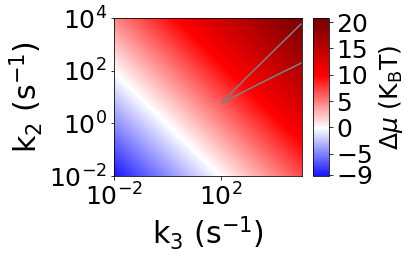

In [21]:
CF=plt.contourf(samplek3,samplek2,my_2d_array_cp,500,cmap=plt.cm.seismic,vmin=-20,vmax=20)
v=np.array((-9,-5,0,5,10,15,20),dtype=float)
cb=plt.colorbar(ticks=v,aspect=10)
cb.set_label(label='$\Delta$$\mu$ ($\mathregular{K_BT}$)',fontsize=25)
cb.ax.tick_params(labelsize=25) #ax in EXTRAMEDLY IMPORTNAT!!
CL=plt.contour(samplek3,samplek2,matrix_diff,1,cmap=plt.cm.binary)
ylabel('$\mathregular{k_2}$ (s${^{-1}}$)',fontsize=30);xlabel('$\mathregular{k_3}$ (s${^{-1}}$)',fontsize=30)
tick_params(axis='both',which='major',labelsize=25) # tick size for axis in plot
yscale('log');xscale('log') # Log scale
tight_layout()
#plt.savefig("chemical_potential_jet_log.pdf")

### Figure 2

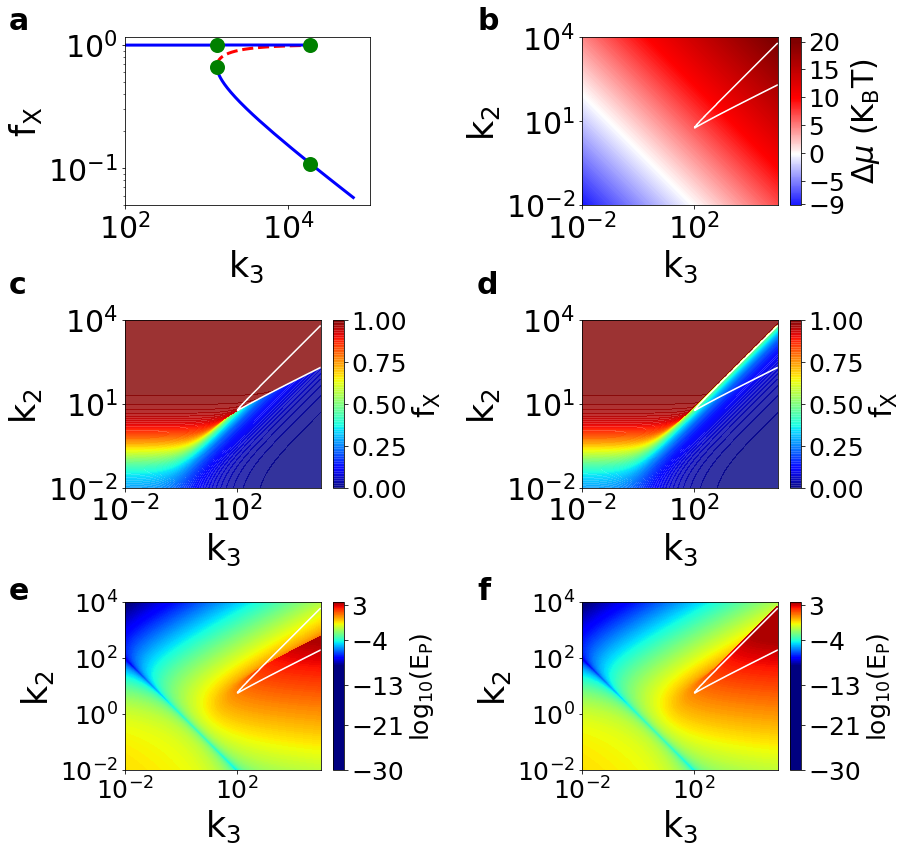

In [23]:
#plt.figure(1)
#plt.figure(figsize = (16,10)); # previous
plt.figure(figsize = (13,12));
#################################
#plt.subplot(321) ## A

ax = plt.subplot(321)
ax.plot(k3_axis0,fsss0,'b-',**plotStyles)
ax.plot(k3_axis,midpoint,'r--',**plotStyles)
ax.plot(k3_axis,fsss,'b-',**plotStyles)
ax.plot(k3_axis,ssss,'b-',**plotStyles)
ax.plot(k3_axis2,fsss2,'b-',**plotStyles)
ax.plot(1349.36,0.668,'go',**plotStyles)
ax.plot(1349.36,1,'go',**plotStyles)
ax.plot(18500,1,'go',**plotStyles)
ax.plot(18500,0.1085,'go',**plotStyles)
xlim([1e+2,1e+5])
yscale('log')
xscale('log')
ax.tick_params(axis='both',which='major',labelsize=30)
xlabel('$\mathregular{k_3}$ ',fontsize=35)
ylabel('$\mathregular{f_{X}}$',fontsize=35)
tight_layout()

#####################################

plt.subplot(322) # B

CF=plt.contourf(samplek3,samplek2,my_2d_array_cp,500,cmap=plt.cm.seismic,vmin=-20,vmax=20)
v=np.array((-9,-5,0,5,10,15,20),dtype=float)
#v=linspace(-9,20,5,endpoint=True).astype(int)
cb=plt.colorbar(ticks=v,aspect=15)
cb.set_label(label='$\Delta$$\mu$ ($\mathregular{K_BT}$)',fontsize=30)
cb.ax.tick_params(labelsize=25) #ax in EXTRAMEDLY IMPORTNAT!!
CL=plt.contour(samplek3,samplek2,matrix_diff,1,colors=('r','white'))
ylabel('$\mathregular{k_2}$ ',fontsize=35);xlabel('$\mathregular{k_3}$',fontsize=35)
tick_params(axis='both',which='major',labelsize=30) # tick size for axis in plot
yscale('log');xscale('log') # Log scale
tight_layout()

#########################
plt.subplot(323) #C

v=linspace(0,1,5,endpoint=True)
CF=plt.contourf(samplek3,samplek2,my_2d_array_sol1,100,cmap=plt.cm.jet,alpha=0.8)
cb=plt.colorbar(ticks=v, aspect=15)
cb.set_label(label='$\mathregular{f_{X}}$',fontsize=30)
cb.ax.tick_params(labelsize=25) #ax in EXTRAMEDLY IMPORTNAT!!
CL=plt.contour(samplek3,samplek2,matrix_diff,1,colors=('r','white'))
ylabel('$\mathregular{k_2}$ ',fontsize=35);xlabel('$\mathregular{k_3}$',fontsize=35)
tick_params(axis='both',which='major',labelsize=30)
yscale('log')
xscale('log')
tight_layout()

############################################
plt.subplot(324) #D

v=linspace(0,1,5,endpoint=True)
CF=plt.contourf(samplek3,samplek2,my_2d_array_sol2,100,cmap=plt.cm.jet,alpha=0.8)
cb=plt.colorbar(ticks=v, aspect=15)
cb.set_label(label='$\mathregular{f_{X}}$',fontsize=30)
cb.ax.tick_params(labelsize=25) #ax in EXTRAMEDLY IMPORTNAT!!
CL=plt.contour(samplek3,samplek2,matrix_diff,1,colors=('r','white'))
ylabel('$\mathregular{k_2}$ ',fontsize=35);xlabel('$\mathregular{k_3}$',fontsize=35)
tick_params(axis='both',which='major',labelsize=30)
yscale('log');xscale('log')
tight_layout()

#########################################
plt.subplot(325) # E

v=linspace(-30,3.5,5,endpoint=True).astype(int)
CF=plt.contourf(samplek3,samplek2,log10my2de1,500,cmap=plt.cm.jet,vmin=-9,vmax=4)
cb=plt.colorbar(ticks=v, aspect=15)
cb.set_label(label='$\log_{10}(\mathregular{E_{P}}$)',fontsize=25)
cb.ax.tick_params(labelsize=25) #ax in EXTRAMEDLY IMPORTNAT!!
CL=plt.contour(samplek3,samplek2,matrix_diff,1,colors=('r','white')) #locator=ticker.LogLocator()
ylabel('$\mathregular{k_2}$ ',fontsize=35);xlabel('$\mathregular{k_3}$',fontsize=35)
tick_params(axis='both',which='major',labelsize=25) # tick size for axis in plot
yscale('log');xscale('log')
tight_layout()
#########################################
plt.subplot(326) #F

v=linspace(-30,3.5,5,endpoint=True).astype(int)
CF=plt.contourf(samplek3,samplek2,log10my2de2,500,cmap=plt.cm.jet,vmin=-9.0,vmax=4.0)
cb=plt.colorbar(ticks=v, aspect=15)
cb.set_label(label='$\log_{10}(\mathregular{E_{P}}$)',fontsize=25)
cb.ax.tick_params(labelsize=25) #ax in EXTRAMEDLY IMPORTNAT!!
CL=plt.contour(samplek3,samplek2,matrix_diff,1,colors=('r','white')) #locator=ticker.LogLocator()
ylabel('$\mathregular{k_2}$ ',fontsize=35);xlabel('$\mathregular{k_3}$',fontsize=35)
tick_params(axis='both',which='major',labelsize=25) # tick size for axis in plot
yscale('log');xscale('log')
tight_layout()

###################################################
figtext(0.025,0.995,"a", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.525,0.995,"b", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.025,0.690,"c", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.525,0.690,"d", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.025,0.335,"e", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
figtext(0.525,0.335,"f", {'ha':'left','va':'top','fontsize':30, 'fontweight':'bold'})
plt.savefig("fig2-deterministic_Solutions_opt_1.png")

# END

In [41]:
%pwd

'/home/bciezah1/Documents/scripts/scripts-05-19-2021'